# MDM-TASK-web command line tools

## Quick introduction

Briefly, the tools are aimed at mining information about protein dynamics. Most tools require a topology file and a molecular dynamics trajectory (but not always). Documentation for the command line tools is obtained uing the "-h" flag (e.g. `../calc_correlation.py -h`). 

This notebook gives a short overview of how the command line tools can be used.

<strong>MDM-TASK-web is available <a href="https://mdmtaskweb.rubi.ru.ac.za/">here</a></strong>

In [1]:
import nglview as nv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dynamic Cross Correlation

DCC determines the pairwise correlation of residue motion across an MD trajectory, using C-alpha atoms by default. It is also possible to use one or more atom types (as found in the topology file), via a comma-separated list of atoms (without spaces) to use for DCC calculation. E.g. 'CA,P'. The backbone phosphorus 'P' atom can be a good choice for representing nucleotide residues. In the resulting plot, residue indices are numbered starting from zero.

In [2]:
%%bash
../calc_correlation.py --step 50 --topology pr1.pdb pr1.xtc

INFO::Using Python 3.6.13 | packaged by conda-forge | (default, Feb 19 2021, 05:36:01) 
[GCC 9.3.0]
INFO::Started at: 2021-09-07 00:55:55.042652
INFO::Preparing a trajectory matrix...
INFO::Correlating...
INFO::Plotting heat map...
INFO::Completed at: 2021-09-07 00:55:57.288783
INFO::- Total time: 0:00:02


<img src="correlation.png" width=600px>

## Residue Interaction Network analysis

Network centrality metrics from a residue interaction network (RIN) are calculated from a single conformation (provided in any MDTraj-supported format). Each graph consists of nodes (protein C-beta, or GLY C-alpha atoms) connected by edges (binary: 0, 1) that are assigned using a user-defined cut-off distance for each protein residue pair. The default cut-off distance of 6.7 Angstroms comes from previous work identifying the first of a series of coordination shells using the radial distribution function in a collection of proteins

In [3]:
!../calc_network.py --topology pr2.pdb --calc-BC pr2.pdb
v = nv.show_file("./pr2_mean_BC.cif")
v.clear_representations()
v.add_representation("spacefill", colorScheme="bfactor")
v.center()
v

INFO::Started at: 2021-09-07 00:55:58.172555
/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/mdtraj/core/trajectory.py:422: UserWarning: top= kwarg ignored since file contains topology information
  warnings.warn('top= kwarg ignored since file contains topology information')
INFO::Calculating centralities...
INFO::Saved DRN metrics as pr2_*.csv.
/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 205
  PDBConstructionWarning,
INFO::Wrote DRN statistic as B-factor in pr2_mean_BC.cif
INFO::Completed at: 2021-09-07 00:55:58.685863
INFO::- Total time: 0:00:00


NGLWidget()

## Dynamic Residue Network analysis

Dynamic Residue Network analysis is calculated from the aggregation of metrics computed from network graphs, which are themselves computed over each frame from a conformational sampling experiment, typically MD. Each graph consists of nodes (protein C-beta, or GLY C-alpha atoms) connected by edges that are assigned using a user-defined cut-off distance for each protein residue pair. The default cut-off distance of 6.7 Angstroms comes from previous work identifying the first of a series of coordination shells using the radial distribution function in a collection of proteins. This value can be changed if desired, for experimentation.
For faster uploads we recommend reducing the input trajectory.

In [4]:
!../calc_network.py --topology pr1.pdb --step 50 --calc-BC pr1.xtc
v = nv.show_file("./pr1_mean_BC.cif")
v.clear_representations()
v.add_representation("spacefill", colorScheme="bfactor")
v.center()
v

INFO::Started at: 2021-09-07 00:55:59.741495
INFO::Calculating centralities...
INFO::Saved DRN metrics as pr1_*.csv.
/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 205
  PDBConstructionWarning,
INFO::Wrote DRN statistic as B-factor in pr1_mean_BC.cif
INFO::Completed at: 2021-09-07 00:56:02.692995
INFO::- Total time: 0:00:02


NGLWidget()

### Custom plotting of DRN results 

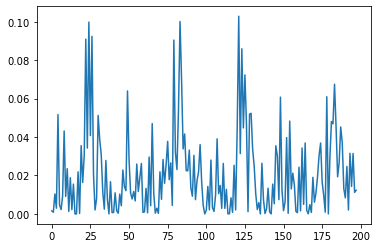

In [5]:
pd.read_csv("./pr2_mean.csv").BC.plot()

# Weighted Residue Contact Map

Generate a weighted network graph using contact frequencies obtained at a defined cut-off radius (typically 6.7) around a protein residue of interest. It can be very useful in getting a weighted contact graph at residue locus of high centrality determined from the DRN metrics. The edge weights represent the contact frequencies determined over the course of the trajectory. It can be coupled to the contact heat map tool for large scale comparisons.

In [6]:
%%bash
../contact_map.py --topology pr1.pdb --step 10 --residue ASH25 --ocsv ASH25_pr1.csv pr1.xtc
../contact_map.py --topology pr2.pdb --step 10 --residue ASH25 --ocsv ASH25_pr2.csv pr2.xtc
../contact_map.py --topology pr3.pdb --step 10 --residue ASH25 --ocsv ASH25_pr3.csv pr3.xtc
../contact_map.py --topology pr4.pdb --step 10 --residue ASH25 --ocsv ASH25_pr4.csv pr4.xtc
../contact_map.py --topology pr5.pdb --step 10 --residue ASH25 --ocsv ASH25_pr5.csv pr5.xtc
../contact_map.py --topology pr6.pdb --step 10 --residue ASH25 --ocsv ASH25_pr6.csv pr6.xtc
../contact_map.py --topology pr7.pdb --step 10 --residue ASH25 --ocsv ASH25_pr7.csv pr7.xtc

Started at: 2021-09-07 00:56:03.681331
Loading trajectory...
Calculating weighted contacts around ASH25 (chain A)...
Generating contact map: ASH25_chainA_contact_map.png
Writing network to ASH25_pr1.csv...
Completed at: 2021-09-07 00:56:04.505953
- Total time: 0:00:00
Started at: 2021-09-07 00:56:05.168395
Loading trajectory...
Calculating weighted contacts around ASH25 (chain A)...
Generating contact map: ASH25_chainA_contact_map.png
Writing network to ASH25_pr2.csv...
Completed at: 2021-09-07 00:56:05.996809
- Total time: 0:00:00
Started at: 2021-09-07 00:56:06.674326
Loading trajectory...
Calculating weighted contacts around ASH25 (chain A)...
Generating contact map: ASH25_chainA_contact_map.png
Writing network to ASH25_pr3.csv...
Completed at: 2021-09-07 00:56:07.516794
- Total time: 0:00:00
Started at: 2021-09-07 00:56:08.211649
Loading trajectory...
Calculating weighted contacts around ASH25 (chain A)...
Generating contact map: ASH25_chainA_contact_map.png
Writing network to ASH2

/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/olivier/bin/anaconda/envs/env36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will b

<img src="ASH25_chainA_contact_map.png" width="600px">

## Weighted Residue Contact Heatmap

The contact heatmap aggregates the CSV files obtained from multiple weighted contact network graphs. This enables high-throughput comparison of the local neighborhoods of a given residue position across comparable samples. For example, a given position can be compared in the presence and absence of a drug. The position of interest may not necessarily be the site of a missense mutation, but can be a useful follow-up method to, for example examine the results of degree centrality mapping in greater detail across multiple mutants or various experimental conditions.

In [7]:
!../contact_heatmap.py --xtickfontsize 8 ASH25_pr*.csv

INFO: Started at: 2021-09-07 00:56:14.623927
INFO: Wrote contact_heatmap.csv
INFO: Completed at: 2021-09-07 00:56:15.258155
INFO: - Total time: 0:00:00


<img src="contact_heatmap.png" width="600px">

## Perturbation response scanning

PRS sequentially applies a set of uniformly distributed forces (Perturbations) to each residue from an initial (reference) conformation before assesing the correlation against a target (final) conformation. The final conformation needs tot be identical to the input topology, but only needs have be homologous residues. For proper representativeness, it is important that the trajectory used for the calculation of the covariance matrix be properly equilibrated.

Let's download an opened conformation HIV protease structure as our <strong>target conformation</strong> from the PDB

In [9]:
!wget https://files.rcsb.org/download/1TW7.pdb

--2021-09-07 00:58:35--  https://files.rcsb.org/download/1TW7.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.197
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1TW7.pdb’

1TW7.pdb                [             <=>    ] 338.00K  71.8KB/s    in 4.7s    

2021-09-07 00:58:41 (71.8 KB/s) - ‘1TW7.pdb’ saved [346113]



In [14]:
nv.show_file('1TW7.pdb')

NGLWidget()

In [12]:
!../prs.py --topology pr1.pdb --perturbations 30 --step 1 --final 1TW7.pdb pr1.xtc 

INFO::Started at: 2021-09-07 00:59:33.331765
INFO::Wrote initial co-ordinate file pr1.xyz
INFO::Wrote initial co-ordinate file 1TW7.xyz
INFO::198 CA atoms recorded for the initial structure
INFO::198 CA atoms recorded for the final structure
INFO::Loading trajectory...
INFO::- Total number of frames = 501
- Number of residues = 198
INFO::- Final trajectory matrix size: (501, 594)
INFO::Aligning trajectory frames...
INFO::- Calculating average structure...
INFO::- Aligning to average structure...
INFO::   - 0.00024524098175745737 Angstroms from previous structure
INFO::   - 6.640535581806101e-07 Angstroms from previous structure
INFO::Calculating difference between frame atoms and average atoms...
INFO::- Calculating R_mat
INFO::- Transposing
INFO::- Calculating corr_mat
INFO::Reading initial and final PDB co-ordinates...
INFO::Calculating experimental difference between initial and final co-ordinates...
INFO::Implementing perturbations sequentially...
INFO::Calculating Pearson's correl

### Custom plotting of PRS correlation data

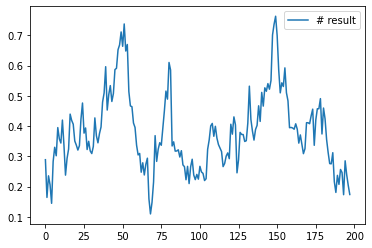

In [13]:
pd.read_csv("result.csv").plot()